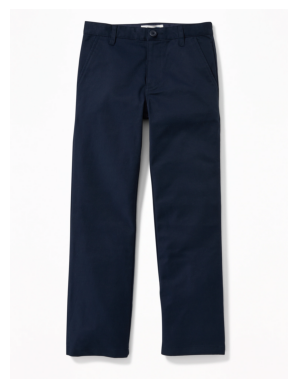

In [11]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import cv2

# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
path = "../misc/pants.png"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = image.copy()
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [3]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [4]:
# cluster the pixel intensities
clt = KMeans(n_clusters = 5)
clt.fit(image)

c:\MARS\program_setups\anaconda3\envs\devQT\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [5]:
# import the necessary packages
import numpy as np
import cv2
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

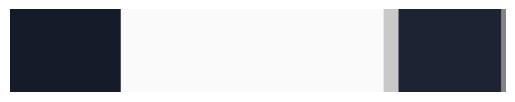

In [7]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, cv2, colorsys
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76, rgb2hsv

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    print(rgb_colors, hex_colors)
    return rgb_colors, hex_colors

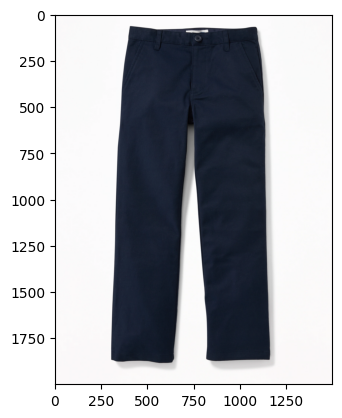

In [12]:
plt.imshow(img)

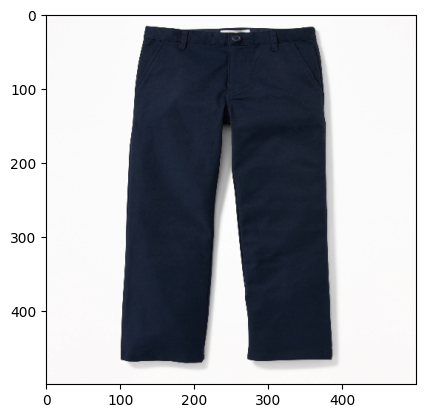

In [15]:
height, width = 500, 500
img = cv2.resize(img, (height, width))
plt.imshow(img)

(200, 200, 3)


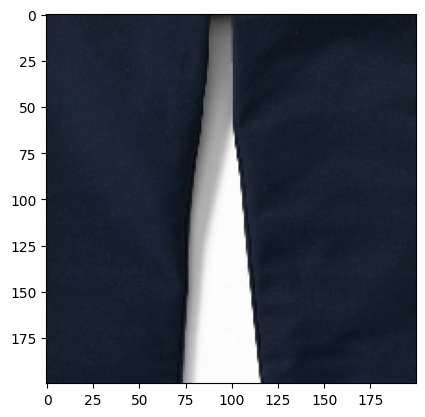

In [25]:
h, w, c = img.shape
margin = 100
window = img[h//2-margin:h//2+margin, w//2-margin:w//2+margin]
print(window.shape)
plt.imshow(window)

c:\MARS\program_setups\anaconda3\envs\devQT\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([250.90472608, 249.89297945, 250.23794187]), array([24.96431072, 32.26150718, 47.31145874]), array([189.00442913, 188.68786909, 189.1336122 ])] ['#faf9fa', '#18202f', '#bdbcbd']


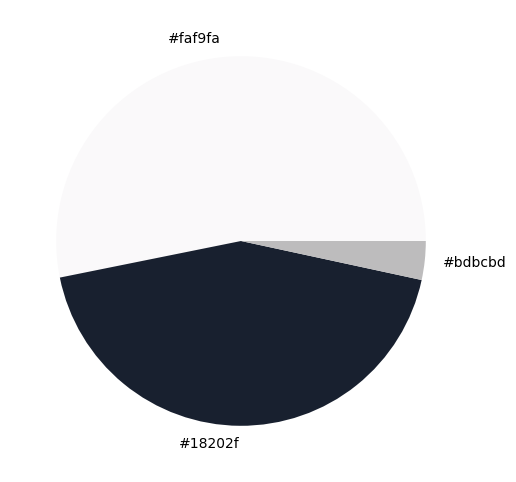

In [29]:
rgb, hex= get_colors(image, 3, True)

In [27]:
hex

['#18202f', '#faf9fa', '#bdbcbd']